In [3]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
#load the datset
df=pd.read_csv(r"C:\Users\Admin\Desktop\Datasets\movies_updated.csv")
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,June 13 1980 (United States),8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772.0,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,July 2 1980 (United States),5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106.0,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,June 20 1980 (United States),8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067.0,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,July 2 1980 (United States),7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539.0,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,July 25 1980 (United States),7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344.0,Orion Pictures,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,Birthday Girl,R,Comedy,2001,February 1 2002 (United States),6.1,25000,Jez Butterworth,Tom Butterworth,Nicole Kidman,United Kingdom,13000000,16171098.0,FilmFour,93
3996,Human Nature,R,Comedy,2001,September 12 2001 (France),6.4,18000,Michel Gondry,Charlie Kaufman,Tim Robbins,France,0,1574660.0,Fine Line Features,96
3997,Made,R,Comedy,2001,August 31 2001 (United States),6.4,18000,Jon Favreau,Jon Favreau,Vince Vaughn,United States,5000000,5480653.0,Artisan Entertainment,95
3998,One Night at McCool's,R,Comedy,2001,April 27 2001 (United States),6.1,29000,Harald Zwart,Stan Seidel,Liv Tyler,United States,18000000,13578186.0,October Films,93


In [5]:
#shape of df
df.shape

(4000, 15)

In [6]:
#info iof the df
df.info(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       4000 non-null   object 
 1   rating     3960 non-null   object 
 2   genre      4000 non-null   object 
 3   year       4000 non-null   int64  
 4   released   4000 non-null   object 
 5   score      4000 non-null   float64
 6   votes      4000 non-null   int64  
 7   director   4000 non-null   object 
 8   writer     3999 non-null   object 
 9   star       3999 non-null   object 
 10  country    4000 non-null   object 
 11  budget     4000 non-null   int64  
 12  gross      3831 non-null   float64
 13  company    3990 non-null   object 
 14  runtime    4000 non-null   int64  
dtypes: float64(2), int64(4), object(9)
memory usage: 468.9+ KB


In [7]:
#null values in the df
df.isnull().sum()

name           0
rating        40
genre          0
year           0
released       0
score          0
votes          0
director       0
writer         1
star           1
country        0
budget         0
gross        169
company       10
runtime        0
dtype: int64

In [9]:
#Handling null columns for categorical columns with 'unknown' or most common
df['rating'].fillna(df['rating'].mode()[0],inplace=True)
df['writer'].fillna('Unknown',inplace=True)
df['star'].fillna('Unknown', inplace=True)
df['company'].fillna('Unknown', inplace=True)                    


In [10]:
#Handling null columns in the numerical columns
df['gross'].fillna(df['gross'].median(),inplace=True)

In [11]:
#checking for any remaining null values
df.isnull().sum()

name         0
rating       0
genre        0
year         0
released     0
score        0
votes        0
director     0
writer       0
star         0
country      0
budget       0
gross        0
company      0
runtime      0
dtype: int64

In [14]:
#duplicates in the df
df.duplicated().sum()

0

In [13]:
#describtive statistics
df.describe()

,year,score,votes,budget,gross,runtime
count,4000.000000,4000.000000,4.000000e+03,4.000000e+03,4.000000e+03,4000.000000
mean,1991.191500,6.321950,5.449450e+04,1.542740e+07,4.045943e+07,105.711750
std,5.934529,0.977101,1.427738e+05,2.248639e+07,9.081659e+07,18.470556
min,1980.000000,2.200000,5.100000e+01,0.000000e+00,3.090000e+02,55.000000
25%,1986.000000,5.700000,4.300000e+03,0.000000e+00,3.096997e+06,94.000000
50%,1991.000000,6.400000,1.300000e+04,7.000000e+06,1.183822e+07,102.000000
75%,1996.000000,7.000000,4.500000e+04,2.100000e+07,3.346108e+07,114.000000
max,2001.000000,9.300000,2.400000e+06,2.000000e+08,2.201647e+09,357.000000


VISUALIZATIONS 

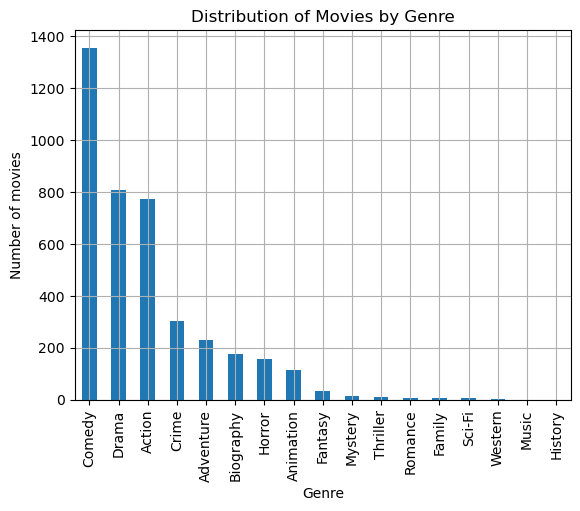

In [30]:
#Distribution of movie by genres
genre_counts=df['genre'].value_counts()
genre_counts.plot(kind='bar')
plt.title('Distribution of Movies by Genre')
plt.xlabel('Genre')
plt.ylabel('Number of movies')
plt.grid(True)
plt.show()


<Figure size 1200x800 with 0 Axes>

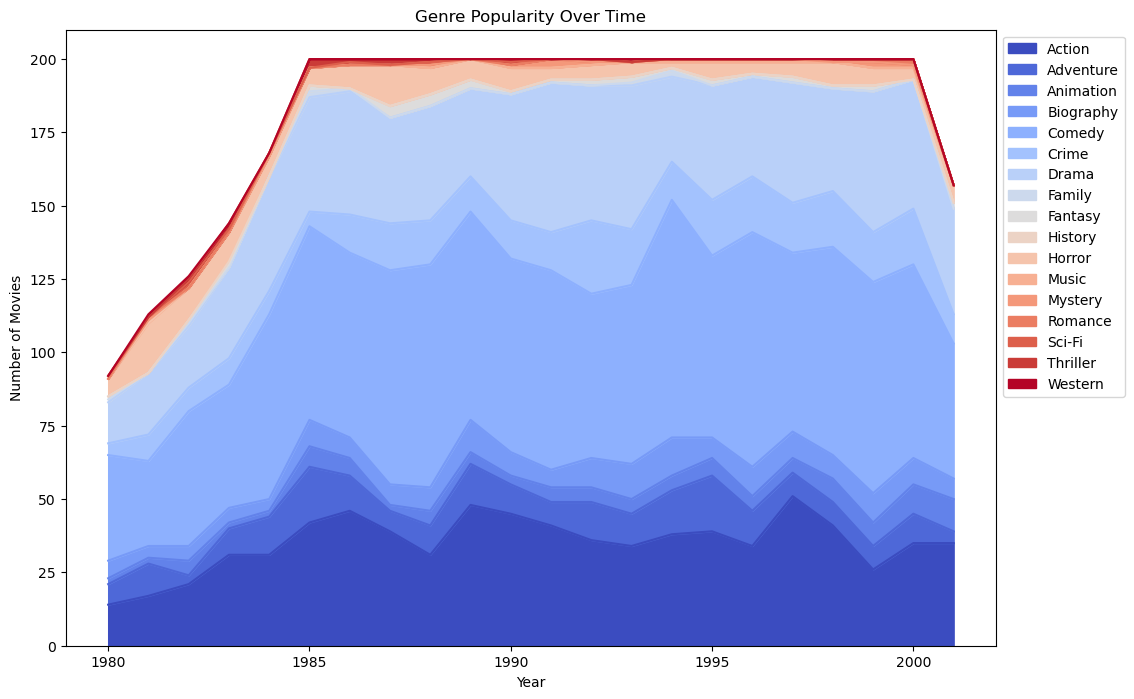

In [32]:
# Analyzing genre popularity over time
genre_by_year = df.groupby(['year', 'genre']).size().unstack().fillna(0)
plt.figure(figsize=(12, 8))
genre_by_year.plot(kind='area', stacked=True, colormap='coolwarm', figsize=(12, 8))
plt.title('Genre Popularity Over Time')
plt.ylabel('Number of Movies')
plt.xlabel('Year')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


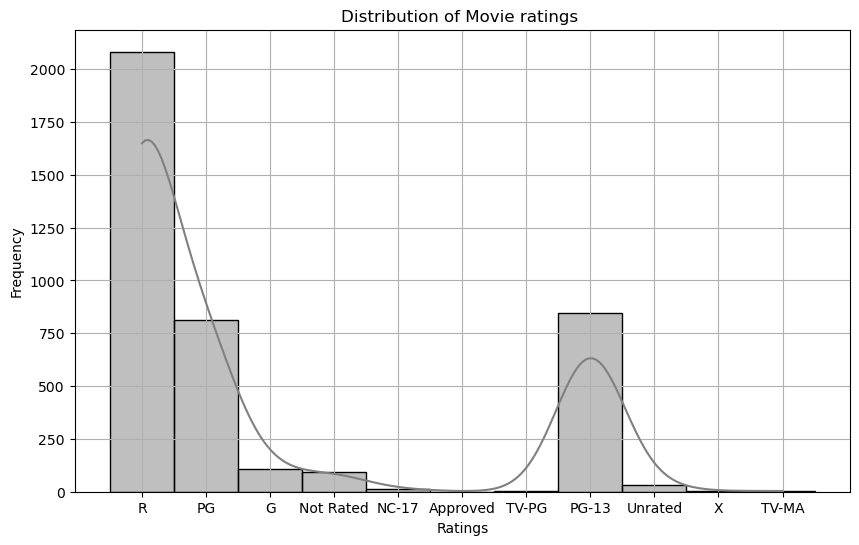

In [28]:
#Distribution of movie ratings
plt.figure(figsize=(10,6))
sns.histplot(df['rating'],bins=10,kde=True, color='grey')
plt.title('Distribution of Movie ratings ')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


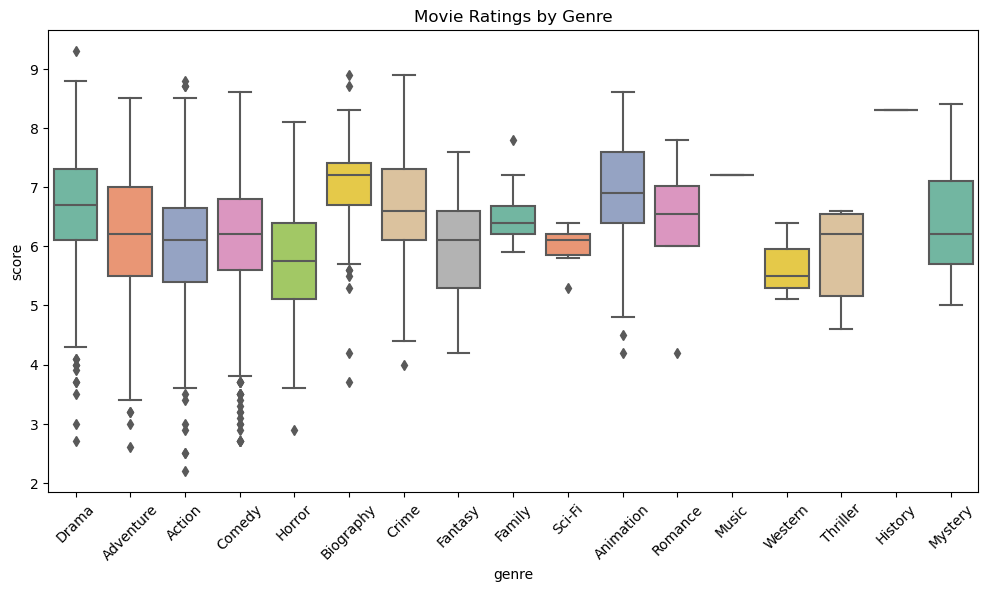

In [33]:
# Ratings distribution by genre
plt.figure(figsize=(12, 6))
sns.boxplot(x='genre', y='score', data=df, palette='Set2')
plt.title('Movie Ratings by Genre')
plt.xticks(rotation=45)
plt.show()

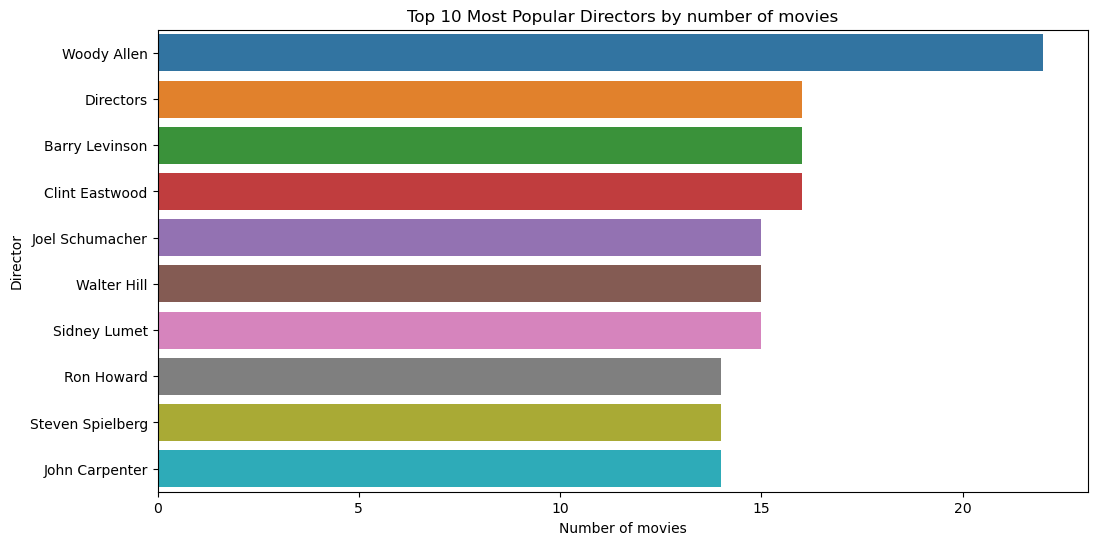

In [38]:
#Count the number of movies by director
director_counts=df['director'].value_counts().head(10)

#distribution of popular directors by number of movies
plt.figure(figsize=(12, 6))
sns.barplot(x=director_counts.values, y=director_counts.index)
plt.title('Top 10 Most Popular Directors by number of movies')
plt.xlabel('Number of movies')
plt.ylabel('Director')
plt.show()

